## FIGURE 3:

LOCAL CHANGES IN IMPERMEANT ANION AVERAGE CHARGE HAS AN EFFECT ON THE LOCAL MEMBRANE POTENTIALS AND CHLORIDE DRIVING FORCES

## IMPORTS

In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## FILE SELECTIONS

In [3]:
#######################################################
#### GUI 

edt_filename1 = widgets.Text(description = 'File name', value='Experiment-D13')
edt_filename2 = widgets.Text(description = 'File name', value='Experiment-D12')
edt_filename3 = widgets.Text(description = 'File name', value='Experiment-D16')
edt_filename4 = widgets.Text(description = 'File name', value='Experiment-D14')
edt_filename5 = widgets.Text(description = 'File name', value='Experiment-D10-v2')

btn_select = widgets.Button(description = 'Select files',button_style='success', enabled=False)
btn_check_files = widgets.Button(description = 'Check files are present', button_style='info')
output_file = widgets.Output()
output_file.clear_output()

display(edt_filename1 ,edt_filename2, edt_filename3, edt_filename4, edt_filename5, btn_check_files, btn_select)

#######################################################
##### CHECK IF FILES ARE IN THE HOME DIRECTORY

def btn_check_files_clicked(b):
    
    file_name_arr= [edt_filename1.value, edt_filename2.value, edt_filename3.value, edt_filename4.value, edt_filename5.value]
    
    for i in range(len(file_name_arr)):
        file_name = "\\"
        file_name = file_name + file_name_arr[i]
        try: 
            with h5py.File(file_name, mode='r') as hdf:
                print(f" {file_name} found")
        except:
            print(f"{file_name} not found")
            
#######################################################
##### LOAD DATA FROM FILES INTO ARRAYS

def btn_select_clicked(b):
    
    global mega_arr, mega_ed_arr, file_name_arr
    
    file_name_arr= [edt_filename1.value, edt_filename2.value, edt_filename3.value, edt_filename4.value, edt_filename5.value]
    
    mega_arr = [] #contains all the compartment data for all the files
    mega_ed_arr = [] #contains all the electrodiffusion data for all the files
    file_name = "\\"
    
    for i in range(len(file_name_arr)):
        
        file_name = "\\"
        file_name = file_name + file_name_arr[i]
        
        with h5py.File(file_name, mode='r') as hdf:
                    
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())

            C1 = C.get(comp_names_arr[0])

            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]

            master_arr = []
            t_arr =[]


            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)

                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])

                    data_arr_2.append(data_arr)

                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         

                master_arr.append(data_arr_2)
                
            print(f" {file_name} compartment data loaded")
            t_arr_bool = False
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                E_group = E.get(E_group_arr[x])
                ED_data_arr =[] #stores the electrodiffusion data for a group

                for y in range(len(list(E_group.keys()))-1): # Looping through all the datasets of the group

                    dataset = E_group.get(str(interval_arr[y+1]))

                    ED_data_arr_2 = [] #stores the dataset values for one dataset
                    for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                        ED_data_arr_2.append(dataset[z])

                    ED_data_arr.append(ED_data_arr_2) 

                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)

            print(f" {file_name} electrodiffusion data loaded")
            
        mega_arr.append(master_arr)
        mega_ed_arr.append(ED_master_arr)
            
            
btn_select.on_click(btn_select_clicked)
btn_check_files.on_click(btn_check_files_clicked)     

Text(value='Experiment-D13', description='File name')

Text(value='Experiment-D12', description='File name')

Text(value='Experiment-D16', description='File name')

Text(value='Experiment-D14', description='File name')

Text(value='Experiment-D10-v2', description='File name')

Button(button_style='info', description='Check files are present', style=ButtonStyle())

Button(button_style='success', description='Select files', style=ButtonStyle())

 \Experiment-D13 found
 \Experiment-D12 found
 \Experiment-D16 found
 \Experiment-D14 found
 \Experiment-D10-v2 found
 \Experiment-D13 compartment data loaded
 \Experiment-D13 electrodiffusion data loaded
 \Experiment-D12 compartment data loaded
 \Experiment-D12 electrodiffusion data loaded
 \Experiment-D16 compartment data loaded
 \Experiment-D16 electrodiffusion data loaded
 \Experiment-D14 compartment data loaded
 \Experiment-D14 electrodiffusion data loaded
 \Experiment-D10-v2 compartment data loaded
 \Experiment-D10-v2 electrodiffusion data loaded


## FIGURE- 3A


Button(button_style='success', description='Plot 3A', style=ButtonStyle())

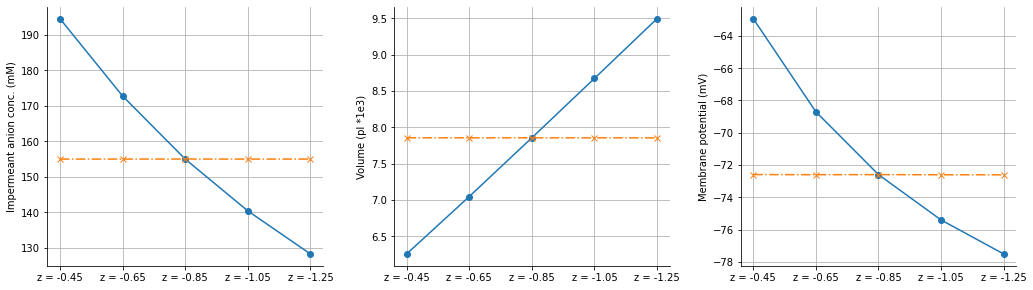

In [24]:
######
btn_plot_3a = widgets.Button(description="Plot 3A", button_style='success')
display(btn_plot_3a)
#####

z_arr = ["z = -0.45","z = -0.65", "z = -0.85", "z = -1.05","z = -1.25",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 


def btn_plot_3a_clicked(b):
    
    f3a, [ax_x,ax_vol, ax_vm] = mplt.subplots(1,3,figsize=(15,5), sharex=False) 
    f3a.tight_layout(pad=4.0)
    
    xconc_8_arr = [mega_arr[i][7][-1][7]*1e3 for i in range(len(mega_arr))]
    xconc_4_arr = [mega_arr[i][3][-1][7]*1e3 for i in range(len(mega_arr))]
    vol_8_arr = [mega_arr[i][7][-1][3]*1e15 for i in range(len(mega_arr))]
    vol_4_arr = [mega_arr[i][3][-1][3]*1e15 for i in range(len(mega_arr))]
    vm_8_arr = [mega_arr[i][7][-1][-3]*1e3 for i in range(len(mega_arr))]
    vm_4_arr = [mega_arr[i][3][-1][-3]*1e3 for i in range(len(mega_arr))]
    
    
    #ax_x.set_title("Compartment 8")
    ax_x.plot(z_arr,xconc_8_arr,linestyle='-',marker='o')
    ax_x.plot(z_arr,xconc_4_arr,linestyle='-.',marker='x')
    ax_x.set_ylabel("Impermeant anion conc. (mM)")
    ax_x.grid()
    
    ax_vol.plot(z_arr,vol_8_arr,linestyle='-',marker='o')
    ax_vol.plot(z_arr,vol_4_arr,linestyle='-.',marker='x')
    ax_vol.set_ylabel("Volume (pl *1e3)")
    ax_vol.grid()
    
    ax_vm.plot(z_arr,vm_8_arr,linestyle='-',marker='o')
    ax_vm.plot(z_arr,vm_4_arr,linestyle='-.',marker='x')
    ax_vm.set_ylabel("Membrane potential (mV)")
    ax_vm.grid()
    
    sns.despine()
    
    
#####
btn_plot_3a.on_click(btn_plot_3a_clicked)

## FIGURE-3B

Button(button_style='success', description='Plot 3B', style=ButtonStyle())

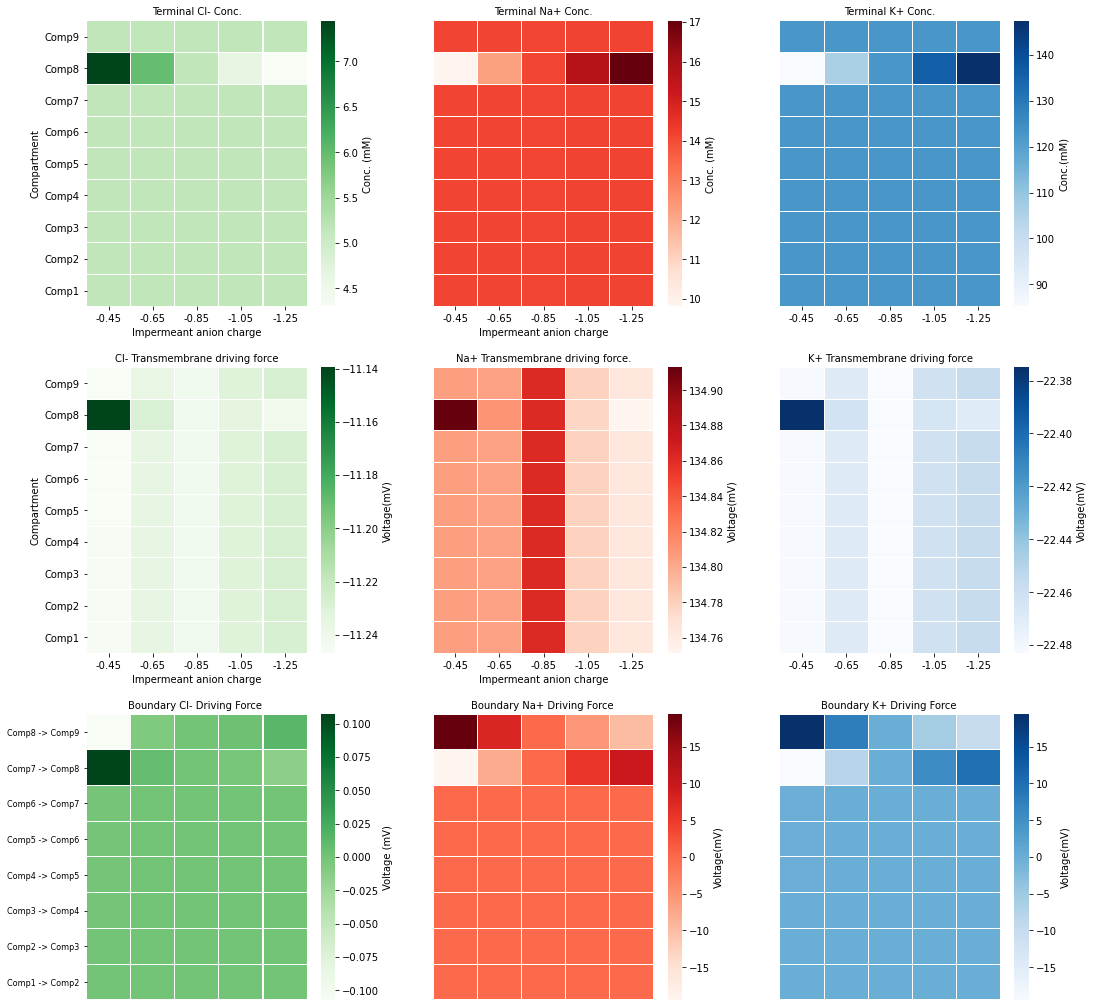

In [55]:
######
btn_plot_3b = widgets.Button(description="Plot 3B", button_style='success')
display(btn_plot_3b)
#####

z_arr = ["z = -0.45","z = -0.65", "z = -0.85", "z = -1.05","z = -1.25"]
z_arr_2 = [-0.45,-0.65,-0.85,-1.05,-1.25]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 


def btn_plot_3b_clicked(b):
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    f3b, [(ax_cl, ax_na , ax_k),(ax_cl_df, ax_na_df,ax_k_df),(ax_cl_bdf,ax_na_bdf,ax_k_bdf)] =mplt.subplots(3,3, figsize=(15,15))
    f3b.tight_layout(pad=4.0)
    width =0.3
    
    #####################################################################################
    # ROW 1 & 2 
    #####################################################################################
    
    cl_arr,na_arr, k_arr = [],[],[]
    cl_df_arr, na_df_arr, k_df_arr = [], [], []
    
    for i in range(len(comp_names_arr),0,-1):
        
        temp_arr_cl = [mega_arr[j][i-1][-1][6] *1e3 for j in  range(len(mega_arr))] 
        cl_arr.append(temp_arr_cl)
        
        temp_arr_na = [mega_arr[j][i-1][-1][4] *1e3 for j in  range(len(mega_arr))] 
        na_arr.append(temp_arr_na)
        
        temp_arr_k = [mega_arr[j][i-1][-1][5] *1e3 for j in  range(len(mega_arr))] 
        k_arr.append(temp_arr_k)
        
        temp_arr_df= [mega_arr[j][i-1][-1][-1]*1e3 - mega_arr[j][i-1][-1][-3]*1e3 for j in range(len(mega_arr))] 
        cl_df_arr.append(temp_arr_df)
        
        temp_arr_df= [(-1*RTF * np.log(mega_arr[j][i-1][-1][4]/145e-3))*1e3 - mega_arr[j][i-1][-1][-3]*1e3 for j in range(len(mega_arr))] 
        na_df_arr.append(temp_arr_df)
        
        temp_arr_df = [mega_arr[j][i-1][-1][-2]*1e3 - mega_arr[j][i-1][-1][-3]*1e3 for j in range(len(mega_arr))] 
        k_df_arr.append(temp_arr_df)
    
    g = sns.heatmap(cl_arr,cmap="Greens",  cbar_kws={'pad':0.05,'label':'Conc. (mM)', 'orientation':'vertical' }, ax=ax_cl,linewidth=0.01 )
    g.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("Impermeant anion charge",fontsize=10)
    ax_cl.set_title("Terminal Cl- Conc.",fontsize=10)
    
    g = sns.heatmap(na_arr,yticklabels=False, cmap="Reds",cbar_kws={'pad':0.05,'label':'Conc. (mM)', 'orientation':'vertical' }, ax=ax_na,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("Impermeant anion charge",fontsize=10)
    ax_na.set_title("Terminal Na+ Conc.",fontsize=10)
    
    g = sns.heatmap(k_arr,yticklabels=False,cmap="Blues",  cbar_kws={'pad':0.05,'label':'Conc.(mM)', 'orientation':'vertical' }, ax=ax_k,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    ax_k.set_title("Terminal K+ Conc.",fontsize=10)
    
    g = sns.heatmap(cl_df_arr,cmap="Greens",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_cl_df,linewidth=0.01 )
    g.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("Impermeant anion charge",fontsize=10)
    ax_cl_df.set_title("Cl- Transmembrane driving force",fontsize=10)
    
    g = sns.heatmap(na_df_arr,yticklabels=False, cmap="Reds",cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_na_df,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    g.set_xlabel("Impermeant anion charge",fontsize=10)
    ax_na_df.set_title("Na+ Transmembrane driving force.",fontsize=10)
    
    g = sns.heatmap(k_df_arr,yticklabels=False,cmap="Blues",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_k_df,linewidth=0.01 )
    g.set_xticklabels(z_arr_2[::], fontsize=10)
    ax_k_df.set_title("K+ Transmembrane driving force",fontsize=10)
        

    cl_bdf_arr, na_bdf_arr, k_bdf_arr = [], [], []
    
        
    for i in range(len(mega_ed_arr[0]),0,-1):
        
        
        v_bound = [mega_arr[j][i-1][-1][-3] - mega_arr[j][i][-1][-3] for j in range(len(mega_ed_arr))]
        
        ecl_bound = [RTF * np.log(mega_arr[j][i-1][-1][6] / mega_arr[j][i][-1][6]) for j in range(len(mega_ed_arr))]
        temp_bdf = [(v_bound[j] - ecl_bound[j])*1e3 for j in range(len(v_bound))]
        cl_bdf_arr.append(temp_bdf)
        
        ena_bound = [RTF * np.log(mega_arr[j][i-1][-1][4] / mega_arr[j][i][-1][4]) for j in range(len(mega_ed_arr))]
        temp_bdf = [(v_bound[j] - ena_bound[j])*1e3 for j in range(len(v_bound))]
        na_bdf_arr.append(temp_bdf)
        
        ek_bound = [RTF * np.log(mega_arr[j][i-1][-1][5] / mega_arr[j][i][-1][5]) for j in range(len(mega_ed_arr))]
        temp_bdf = [(v_bound[j] - ek_bound[j])*1e3 for j in range(len(v_bound))]
        k_bdf_arr.append(temp_bdf)
        
        
        """
        ena_bound = [RTF * np.log(master_arr[i-1][j][4] / master_arr[i][j][4]) for j in range(len(t_arr))]
        temp_bdf = [(v_bound[j] - ena_bound[j])*1e3 for j in range(len(v_bound))]
        temp_bdf = temp_bdf[1::40]
        na_bdf_arr.append(temp_bdf)
        
        ek_bound = [RTF * np.log(master_arr[i-1][j][5] / master_arr[i][j][5]) for j in range(len(t_arr))]
        temp_bdf = [(v_bound[j] - ena_bound[j])*1e3 for j in range(len(v_bound))]
        temp_bdf = temp_bdf[1::40]
        k_bdf_arr.append(temp_bdf)
        
        
        temp_arr_cl = [master_arr[i-1][j][6] *1e3 for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[1::40]
        cl_arr.append(temp_arr_cl)
    
        v_bound = master_arr[i][time_point][-3] - master_arr[i+1][time_point][-3]
        temp_arr_1.append(v_bound*1e3)
            
        e_cl_bound = 
            temp_arr_2.append(e_cl_bound*1e3)
            
        df_cl_bound = v_bound - e_cl_bound
            temp_arr_3.append(df_cl_bound*1e3)
        

        """
    bound_names_arr = [comp_names_arr[i] + ' -> ' + comp_names_arr[i+1] for i in range(len(comp_names_arr)-1)]


    g = sns.heatmap(cl_bdf_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_cl_bdf,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(bound_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl_bdf.set_title("Boundary Cl- Driving Force ",fontsize=10)
    
    g = sns.heatmap(na_bdf_arr,cmap="Reds",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_na_bdf,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_lower_mid.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    ax_na_bdf.set_title("Boundary Na+ Driving Force ",fontsize=10)
    
    g = sns.heatmap(k_bdf_arr,cmap="Blues",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_k_bdf,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_lower_right.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    ax_k_bdf.set_title("Boundary K+ Driving Force ",fontsize=10)
    

    
#####
btn_plot_3b.on_click(btn_plot_3b_clicked)

## FIG 2B

Comparing the membrane potential, E-Cl and Cl-driving force @ different impermeant anion charges

Button(button_style='success', description='Plot 2B', style=ButtonStyle())

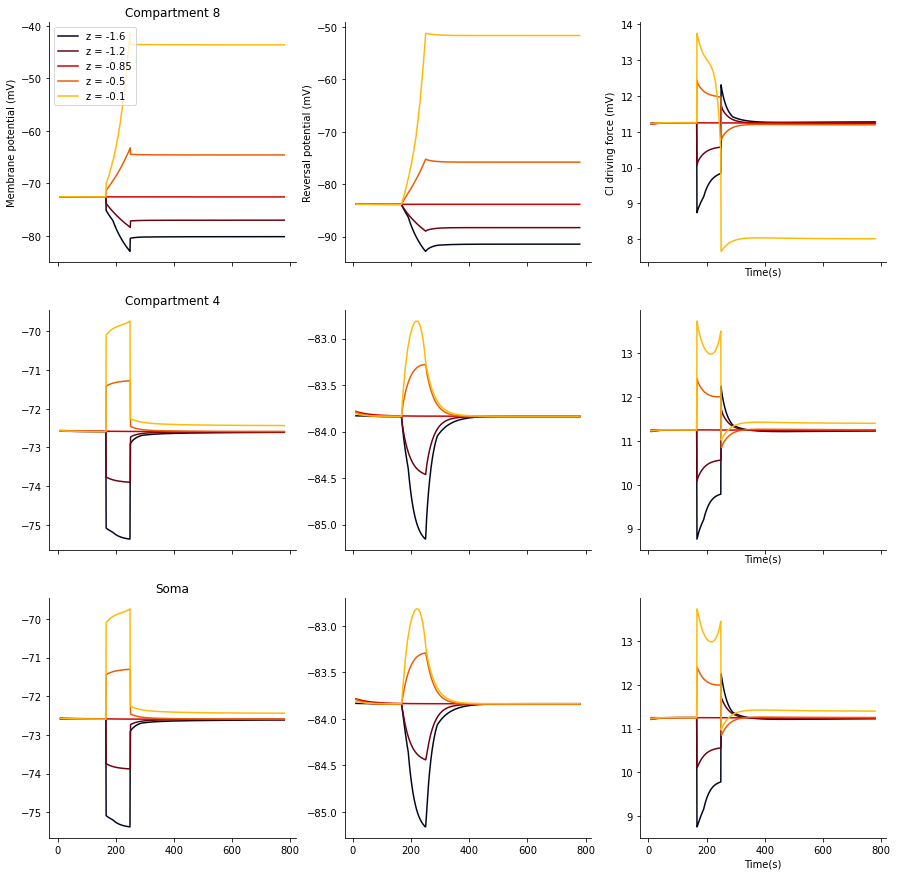

In [7]:
######
btn_plot_2b = widgets.Button(description="Plot 2B", button_style='success')
display(btn_plot_2b)
#####

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 



def btn_plot_2b_clicked(b):
    
    f2b, [(ax8_vm,ax8_ecl,ax8_df),(ax4_vm, ax4_ecl,ax4_df),(ax0_vm,ax0_ecl,ax0_df)] = mplt.subplots(3,3,figsize=(15,15), sharex=True) 
    x_arr = [ i for i in range(781)]
    
    for i in range(len(mega_arr)):
        
        y_8vm_arr, y_8ecl_arr,y_8df_arr = [],[],[]
        y_4vm_arr, y_4ecl_arr,y_4df_arr = [],[],[]
        y_0vm_arr, y_0ecl_arr,y_0df_arr = [],[],[]
        for j in range(781):
            try:
                y_8vm_arr.append(mega_arr[i][8][j][-3]*1e3)
                y_8ecl_arr.append(mega_arr[i][8][j][-1]*1e3)
                y_8df_arr.append(mega_arr[i][8][j][-3]*1e3-mega_arr[i][8][j][-1]*1e3)
                
                y_4vm_arr.append(mega_arr[i][4][j][-3]*1e3)
                y_4ecl_arr.append(mega_arr[i][4][j][-1]*1e3)
                y_4df_arr.append(mega_arr[i][4][j][-3]*1e3-mega_arr[i][4][j][-1]*1e3)
                
                y_0vm_arr.append(mega_arr[i][0][j][-3]*1e3)
                y_0ecl_arr.append(mega_arr[i][0][j][-1]*1e3)
                y_0df_arr.append(mega_arr[i][0][j][-3]*1e3-mega_arr[i][0][j][-1]*1e3)
            except:
                print(i)
                
        ax8_vm.set_title("Compartment 8")
        ax8_vm.plot(x_arr[10:],y_8vm_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_vm.legend()
        ax8_vm.set_ylabel("Membrane potential (mV)")
        ax8_ecl.plot(x_arr[10:],y_8ecl_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_ecl.set_ylabel("E-Cl (mV)")
        ax8_df.plot(x_arr[10:],y_8df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_df.set_ylabel("Cl driving force (mV)")
        ax8_df.set_xlabel("Time(s)")
        
        ax4_vm.set_title("Compartment 4")
        ax8_ecl.set_ylabel("Reversal potential (mV)")
        ax4_vm.plot(x_arr[10:],y_4vm_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax4_ecl.plot(x_arr[10:],y_4ecl_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax4_df.plot(x_arr[10:],y_4df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax4_df.set_xlabel("Time(s)")
        
        ax0_vm.set_title("Soma")
        ax0_vm.plot(x_arr[10:],y_0vm_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax0_ecl.plot(x_arr[10:],y_0ecl_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax0_df.plot(x_arr[10:],y_0df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax0_df.set_xlabel("Time(s)")
        
        
        sns.despine()
        
    

#####
btn_plot_2b.on_click(btn_plot_2b_clicked)

## FIG 2C


Button(button_style='success', description='Plot 2C', style=ButtonStyle())

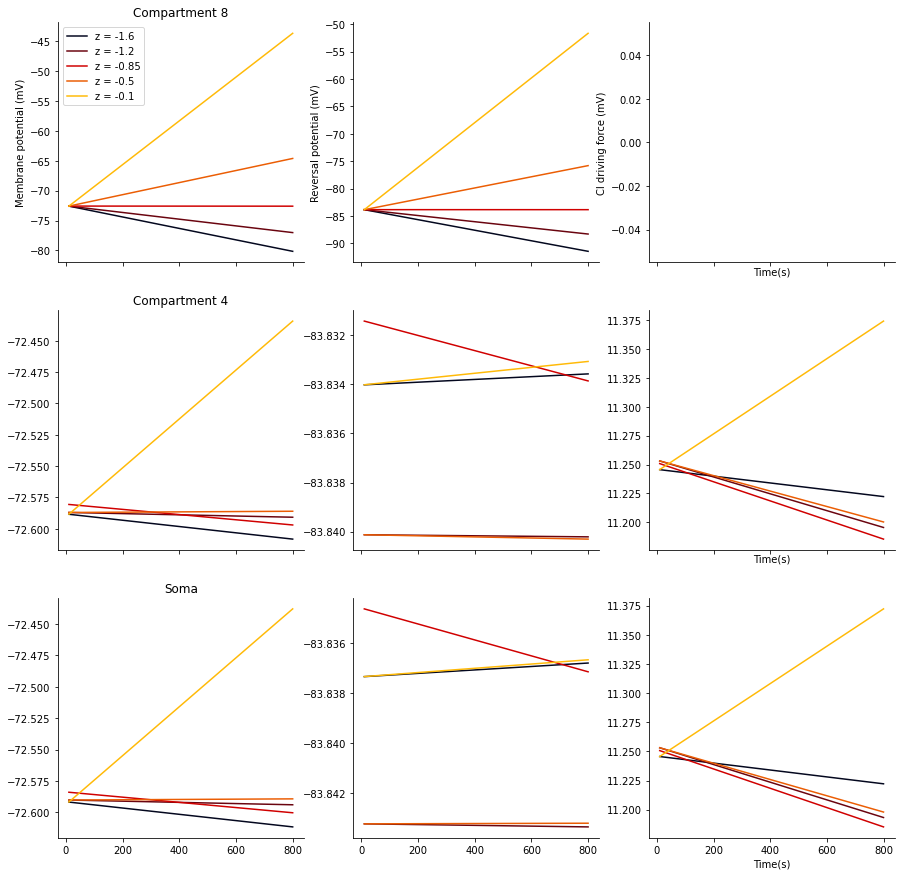

In [8]:
######
btn_plot_2c = widgets.Button(description="Plot 2C", button_style='success')
display(btn_plot_2c)
#####

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 



def btn_plot_2c_clicked(b):
    
    f2c, [(ax8_vm,ax8_ecl,ax8_df),(ax4_vm, ax4_ecl,ax4_df),(ax0_vm,ax0_ecl,ax0_df)] = mplt.subplots(3,3,figsize=(15,15), sharex=True) 
    x_arr = [10,800]
    
    for i in range(len(mega_arr)):
        
        y_8vm_arr, y_8ecl_arr,y_8df_arr = [],[],[]
        y_4vm_arr, y_4ecl_arr,y_4df_arr = [],[],[]
        y_0vm_arr, y_0ecl_arr,y_0df_arr = [],[],[]
        
        try:
            y_8vm_arr.append(mega_arr[i][8][165][-3]*1e3)
            y_8ecl_arr.append(mega_arr[i][8][165][-1]*1e3)
            y_8df_arr.append(mega_arr[i][8][165][-3]*1e3-mega_arr[i][8][165][-1]*1e3)
                
            y_4vm_arr.append(mega_arr[i][4][165][-3]*1e3)
            y_4ecl_arr.append(mega_arr[i][4][165][-1]*1e3)
            y_4df_arr.append(mega_arr[i][4][165][-3]*1e3-mega_arr[i][4][165][-1]*1e3)
                
            y_0vm_arr.append(mega_arr[i][0][165][-3]*1e3)
            y_0ecl_arr.append(mega_arr[i][0][165][-1]*1e3)
            y_0df_arr.append(mega_arr[i][0][165][-3]*1e3-mega_arr[i][0][165][-1]*1e3)
            
            
            y_8vm_arr.append(mega_arr[i][8][-1][-3]*1e3)
            y_8ecl_arr.append(mega_arr[i][8][-1][-1]*1e3)
            y_8df_arr.append(mega_arr[i][8][-1][-3]*1e3-mega_arr[i][8][10][-1]*1e3)
                
            y_4vm_arr.append(mega_arr[i][4][-1][-3]*1e3)
            y_4ecl_arr.append(mega_arr[i][4][-1][-1]*1e3)
            y_4df_arr.append(mega_arr[i][4][-1][-3]*1e3-mega_arr[i][4][10][-1]*1e3)
                
            y_0vm_arr.append(mega_arr[i][0][-1][-3]*1e3)
            y_0ecl_arr.append(mega_arr[i][0][-1][-1]*1e3)
            y_0df_arr.append(mega_arr[i][0][-1][-3]*1e3-mega_arr[i][0][10][-1]*1e3)
        except:
            print(i)
                
        ax8_vm.set_title("Compartment 8")
        ax8_vm.plot(x_arr,y_8vm_arr, label = z_arr[i], color= colour_arr[i])
        ax8_vm.legend()
        ax8_vm.set_ylabel("Membrane potential (mV)")
        ax8_ecl.plot(x_arr,y_8ecl_arr, label = z_arr[i], color= colour_arr[i])
        ax8_ecl.set_ylabel("E-Cl (mV)")
        ax8_df.plot(x_arr[10:],y_8df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_df.set_ylabel("Cl driving force (mV)")
        ax8_df.set_xlabel("Time(s)")
        
        ax4_vm.set_title("Compartment 4")
        ax8_ecl.set_ylabel("Reversal potential (mV)")
        ax4_vm.plot(x_arr,y_4vm_arr, label = z_arr[i], color= colour_arr[i])
        ax4_ecl.plot(x_arr,y_4ecl_arr, label = z_arr[i], color= colour_arr[i])
        ax4_df.plot(x_arr,y_4df_arr, label = z_arr[i], color= colour_arr[i])
        ax4_df.set_xlabel("Time(s)")
        
        ax0_vm.set_title("Soma")
        ax0_vm.plot(x_arr,y_0vm_arr, label = z_arr[i], color= colour_arr[i])
        ax0_ecl.plot(x_arr,y_0ecl_arr, label = z_arr[i], color= colour_arr[i])
        ax0_df.plot(x_arr,y_0df_arr, label = z_arr[i], color= colour_arr[i])
        ax0_df.set_xlabel("Time(s)")
        
        
        sns.despine()
        
    

#####
btn_plot_2c.on_click(btn_plot_2c_clicked)

# Fig 2D - chloride microdomains in each experiment

Text(159.0, 0.5, 'Valence')

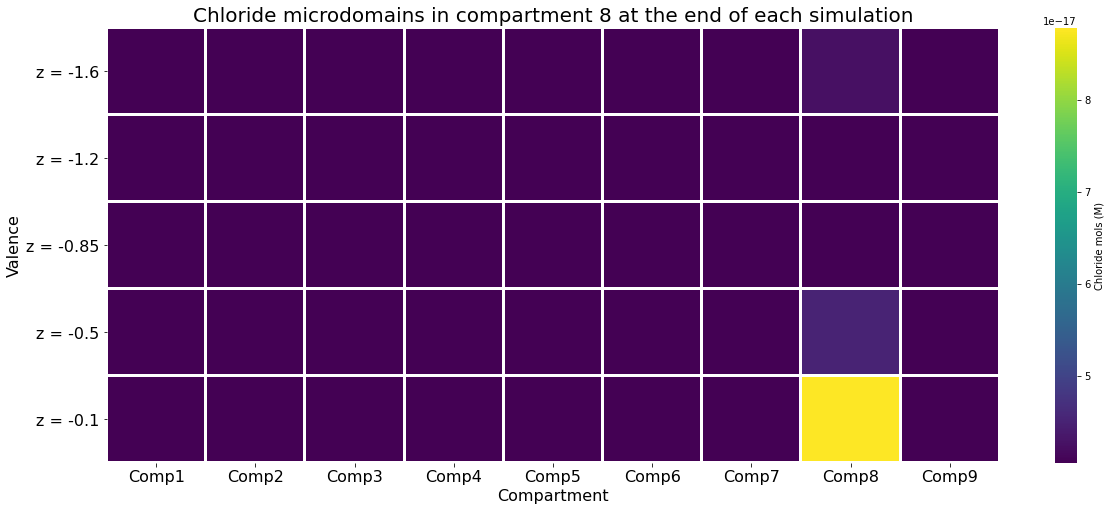

In [28]:

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 


cl_arr=[]

x_ax_labels = comp_names_arr[1:]

for i in range(len(z_arr)):
        
    temp_arr = []
    
    for c in range(len(comp_names_arr)-1):
            
        temp_arr.append(mega_arr[i][c+1][-1][6] * mega_arr[i][c+1][-1][3])  
        
    cl_arr.append(temp_arr)
     

f_cl, (ax_cl) = mplt.subplots(figsize=(20 , 8 ))

    
ax_cl = sns.heatmap(cl_arr,cmap="viridis", linewidth=2,cbar_kws={'label':'Chloride mols (M)'},cbar=True,ax=ax_cl)
ax_cl.set_yticklabels(z_arr, fontsize=16, rotation=0)
ax_cl.set_xticklabels(x_ax_labels, fontsize=16)
ax_cl.set_title("Chloride microdomains in compartment 8 at the end of each simulation", fontsize=20)
ax_cl.set_xlabel("Compartment", fontsize=16)
ax_cl.set_ylabel("Valence", fontsize=16)\


